# CS4035 - Cyber Data Analytics - Assignment 1


## Data Pre-processing
In this section, we carry out various data pre-processing we deemed necesarry for both visualization and easier classification purposes. 

In [3]:
import time
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt



%matplotlib inline


For preprocessing, a script named preprocess.py is available in the src directory which can be perused through to understand what the functions do. For brevity's purpose, only changes made are reported and not how the changes are done. 

In [4]:
from src.preprocess import *

Running the following cell will give indicative information on what was done with the data. Summarizing, the transactions with 'Refused' entry in the 'simple_journal' column and values with NA are dropped. CVCResponse codes greater than 2 are coded as 3 and the creationDate is converted to datetime format.

In [5]:
if __name__ == "__main__":
    pass
    filename = '../data/data_for_student_case.csv'
    df = getData(filename)
    getCounter(df, 'simple_journal')
    

 - Objects :  290382
  --> Col :  simple_journal  || Vals :  [('Settled', 236691), ('Refused', 53346), ('Chargeback', 345)]
 - Objects (no NA) :  274567
  --> Col :  simple_journal  || Vals :  [('Settled', 223165), ('Refused', 51057), ('Chargeback', 345)]
 - Dropping Refused
  --> Col :  simple_journal  || Vals :  [('Settled', 223165), ('Chargeback', 345)]
 - Saved File!
  --> Col :  simple_journal  || Vals :  [('Settled', 223165), ('Chargeback', 345)]


In the following cell, data is processed further. the hours from the creationDate are extracted separately. The amount is converted to USD. The norm of the converted amount is also obtained. The caregorical variables are converted to codes. And certain fields deemd unnecessary are dropped.

In [6]:
if __name__ == "__main__":
    currency_conv = {'SEK':0.09703,'MXN':0.04358,'AUD':0.63161,'NZD':0.58377,'GBP':1.13355}
    filename      = '../data/data_for_student_case_v1.csv'
    df           = pd.read_csv(filename)
    # df2        = getProcessedData(df1, column_coding = False, identifiers=False)
    df           = getProcessedData(df, currency_conv, column_coding = False, identifiers=False)
    
    print (' ------------------------ ')
    for col in df.columns:
        tmp_unique = df[col].unique()
        print ('Col : ', col, ' || Vals : ', tmp_unique[:10])
    
    if (0):
        tmp = df[df['Y'] == 1]
        print (len(tmp))
        tmp.groupby(['Y', 'issuercountrycode']).count().sort_values('txvariantcode', ascending=False)['txvariantcode']
        tmp = df[['currencycode', 'amount', 'amount1','convertedAmount', 'convertedAmount_norm']]
        tmp.sort_values('convertedAmount', ascending=False)
                
        #df2_fraud    = df2[df2['Y'] == 1]
        #df2_nonfraud = df2[df2['Y'] == 0]

 - issuercountrycode (unique count)  :  115
 - shoppercountrycode (unique count) :  143
  --> Col :  Y  || Vals :  [(0, 223165), (1, 345)]
 ------------------------ 
Col :  issuercountrycode  || Vals :  ['MX' 'SA' 'CA' 'AR' 'CL' 'CO' 'FR' 'US' 'JP' 'AE']
Col :  txvariantcode  || Vals :  ['mccredit' 'visaclassic' 'mcdebit' 'visagold' 'visaplatinum' 'visadebit'
 'visabusiness' 'visa' 'visacorporate' 'electron']
Col :  amount  || Vals :  [ 64800.  44900. 149900. 109900.  89900.  79900.  69900. 129900.  99900.
  84915.]
Col :  currencycode  || Vals :  ['MXN' 'AUD' 'NZD' 'GBP' 'SEK']
Col :  shoppercountrycode  || Vals :  ['MX' 'US' 'CA' 'AR' 'IT' 'NZ' 'IL' 'CO' 'DE' 'AE']
Col :  shopperinteraction  || Vals :  ['Ecommerce' 'ContAuth' 'POS']
Col :  cardverificationcodesupplied  || Vals :  [1 0]
Col :  cvcresponsecode  || Vals :  [0 1 3 2]
Col :  creationdate  || Vals :  ['2015-07-01T23:03:11.000000000' '2015-07-02T04:50:55.000000000'
 '2015-07-02T14:30:28.000000000' '2015-07-03T07:53:37.00000

In the cell below, one hot encoding/codes is done for 'txvariantcode', 'currencycode', 'shopperinteraction', 'cvcresponsecode', 'accountcode'. Depending on the type_encoding parameter the associated encoding can be done. One hot encoding is done to capture more features. However, not every variable is one hot encoded, since the number of features increases drastically pushing us into the curse of dimensionality. This generates the data file data_for_student_case_v5.csv.

In [7]:
if __name__ == "__main__":
    type_encoding = 'onehot'
    df  = pd.read_csv('../data/data_for_student_case_v3.csv')
    df3 = encoding(df, type_encoding) 

 - Original Column Count :  15
 - Col : txvariantcode  || Extra cols added :  12
 - Col : currencycode  || Extra cols added :  5
 - Col : shopperinteraction  || Extra cols added :  3
 - Col : cvcresponsecode  || Extra cols added :  4
 - Col : accountcode  || Extra cols added :  4
 - Final Column Count :  52


The cell below creates the 'codes' - one hot encoding data file, data_for_student_case_v6.csv which is used in the classification tasks.

In [34]:
if __name__ == "__main__":
    type_encoding = 'codes'
    df  = pd.read_csv('../data/data_for_student_case_v3.csv')
    df3 = encoding(df, type_encoding) 

 - Original Column Count :  15
 - Final Column Count :  29


## Task A - Visualization

In the previous section, we carried various data pre-processing required to make the actual modeling easier. The aim of the visualization task is to compare the benign and fraudulent transactions. Initially, we plot the histogram and fit a kernel density estimate. 

In [10]:
from src.plots import *

Below, we draw a histogram and fit a kernel density estimate. Comparing the fraudulent from the benign, we can find that benign transactions are more densely distributed around 100 USD, while fraud transactions are more likey to be greater amounts. 

C:\Users\sujit\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


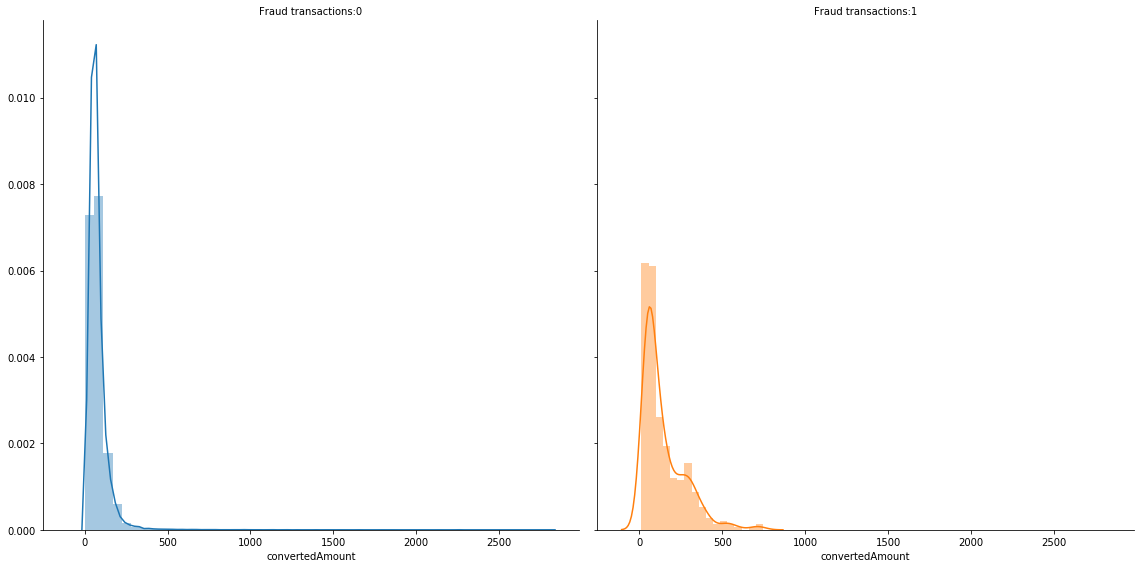

In [11]:
plot1(df)

In order to check if fraudsters target certain methods of shopping, we plot a histogram based on the shopping methods (shopperinteraction used). We find that POS is never used in fraudulent transactions. Fraudulent transactions are mainly found in Ecommerce and ContAuth. The amount on the y axis is averaged. 

C:\Users\sujit\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


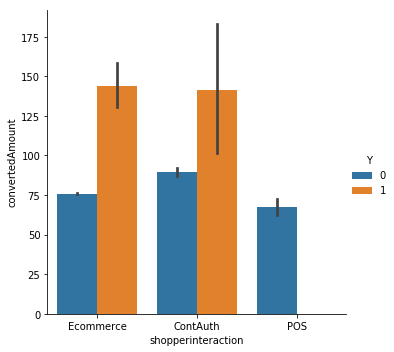

In [12]:
plot2(df)

We found this interesting and decided to plot separate histograms for each shipperinteraction method. The histograms are present below. From the plots above, we find that most of the fraud transactions happened in Ecommerce (online transactions). Only few of them appeared in ContAuth(subscription). It is interesting to note that when using subscription services(ContAuth), fraudulent transactions were found only in GBP currency. 

Apart from that, we infer that majority of Ecommerce fraud transactions happened in SEK and MXN. In other word, there is a significant difference in fraud occurrence among different currencycodes. It implies that currencycode and shopper interaction can be used as informative features.

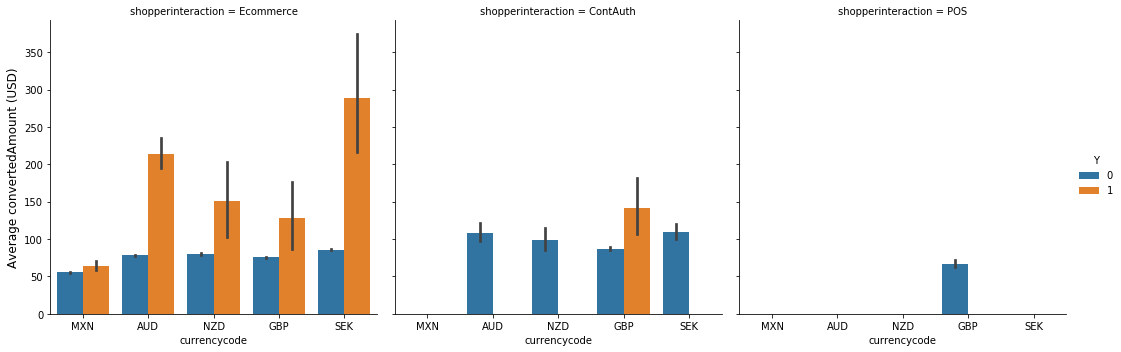

In [13]:
plot3(df)

As shown in the boxplot below, it is noteworthy that different currencycodes have similar distributions of benign transactions but various distribution of fraud transactions.

C:\Users\sujit\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


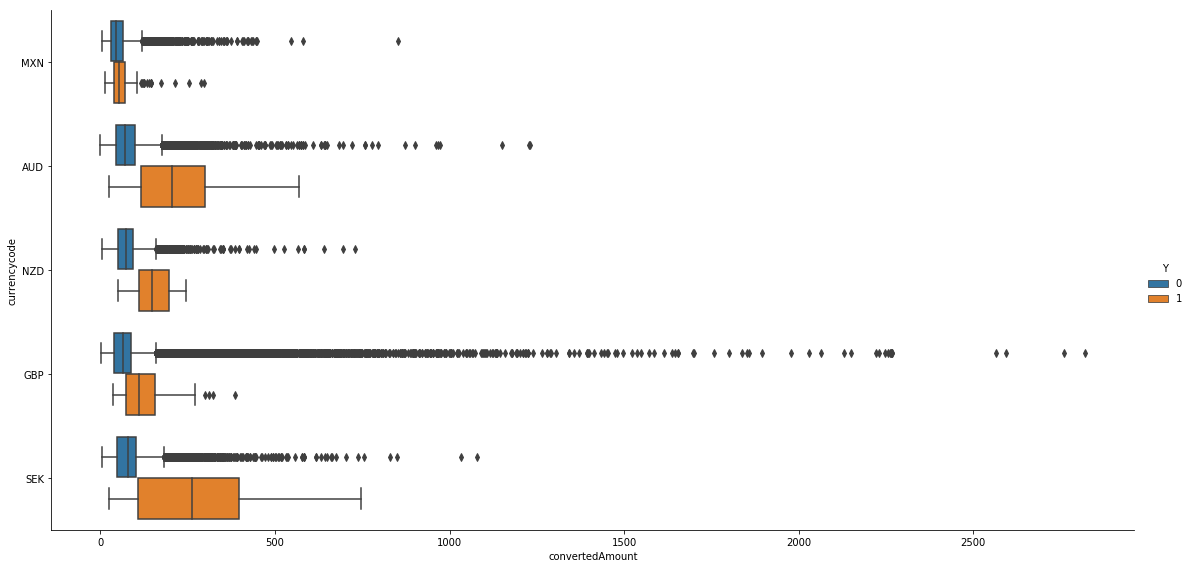

In [14]:
plot4(df)

From the plot below, fraudulent transactions only happenend in "match(1)" and "unknown(1)", while benign transactions covered all the four types of cvcresponsecode. CVCresponsecode, then, seems to be an informative feature.

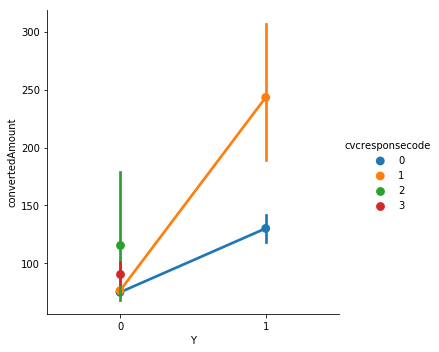

In [15]:
plot5(df)

In order to capture/visualize temporal effects, the creationdate is processed into various sub parts, some of which are visualized below.

In [16]:
df['creation_date'] = pd.to_datetime(df['creationdate'],format='%Y-%m-%d %H:%M:%S')
df['creation_month'] = df.creation_date.dt.month
df['creation_weekday'] = df.creation_date.dt.weekday
df['creation_hr'] = df.creation_date.dt.hour
df['creation_day'] = df.creation_date.dt.date

Fraudulent transactions happen more or less at every hour. Benign transactions are more between 10am and 4pm. But on the overall fraudulent transactions are not very high in amount. 

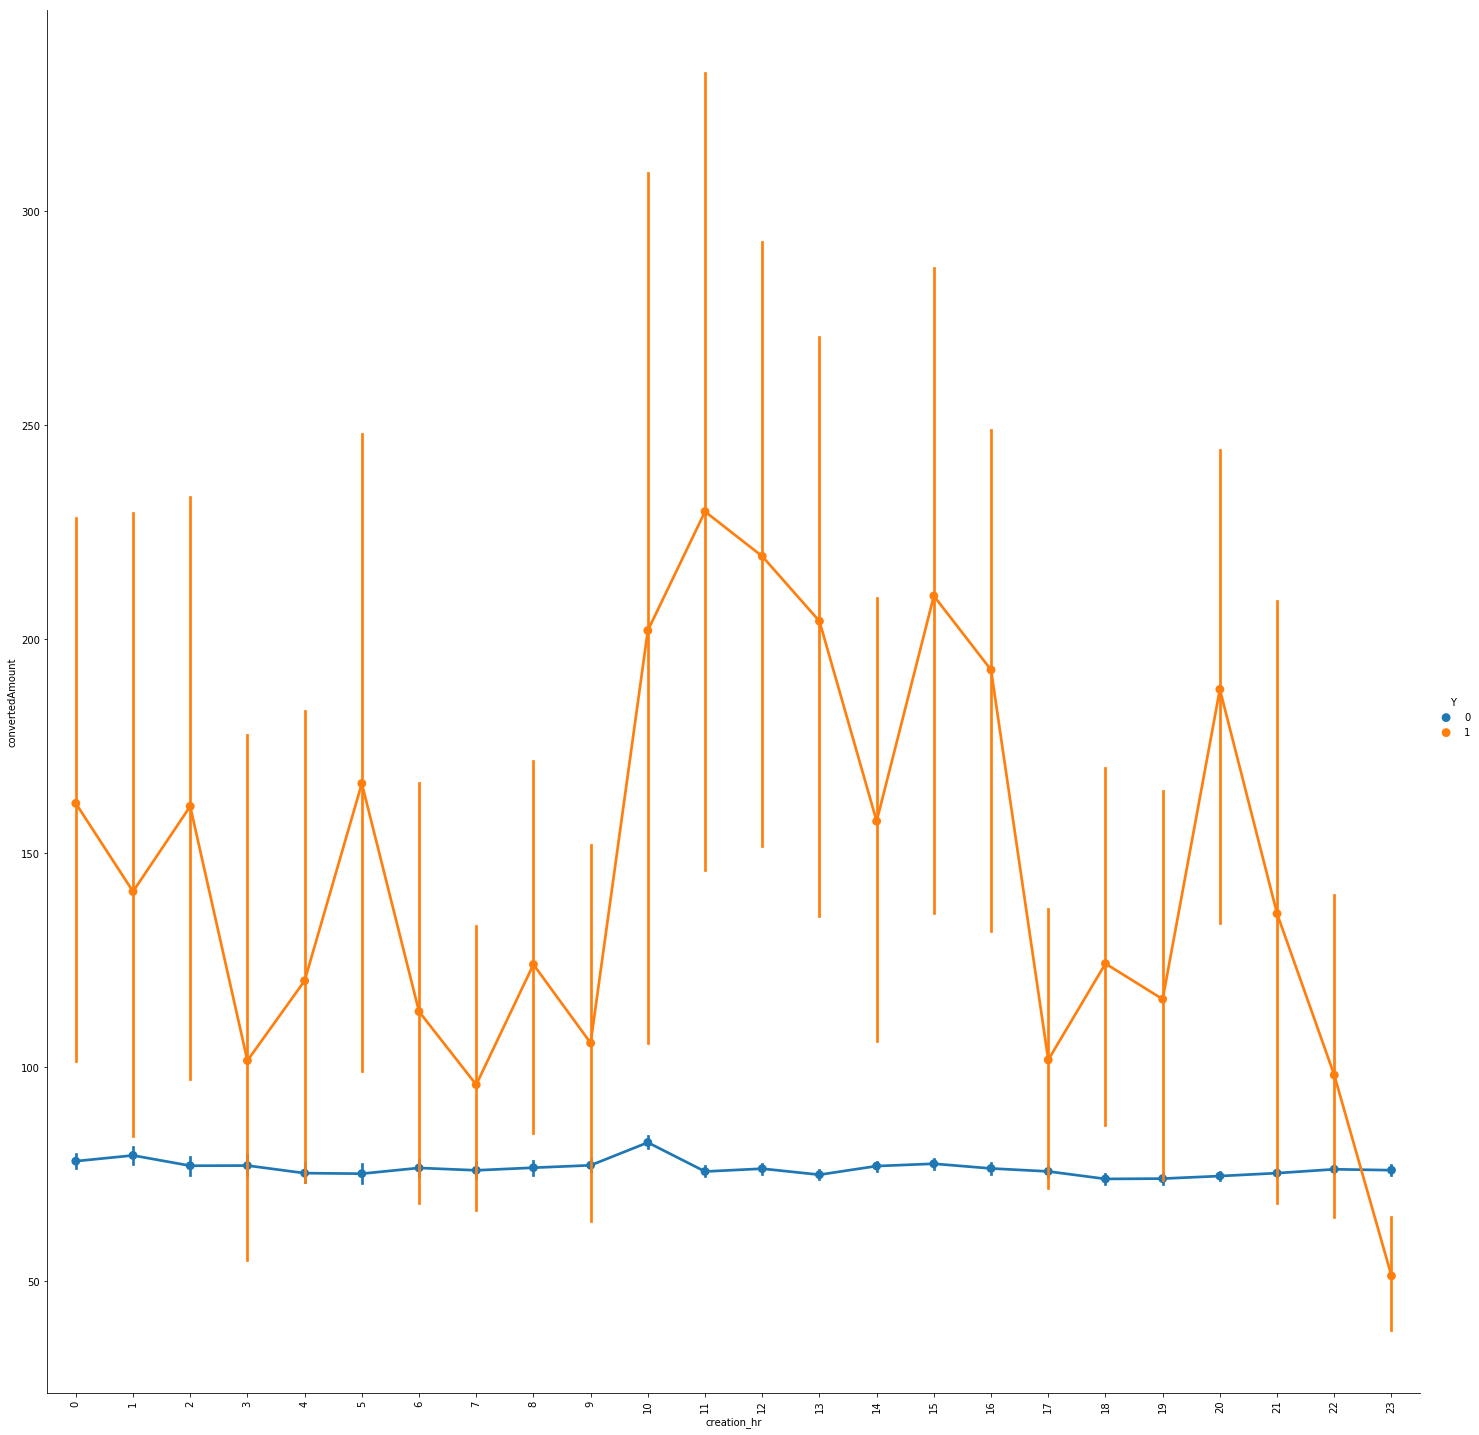

In [17]:
plot6(df)

When we plot amount based on creation day, there certainly exist certain fraudulent transactions that are of a hefty amount. 

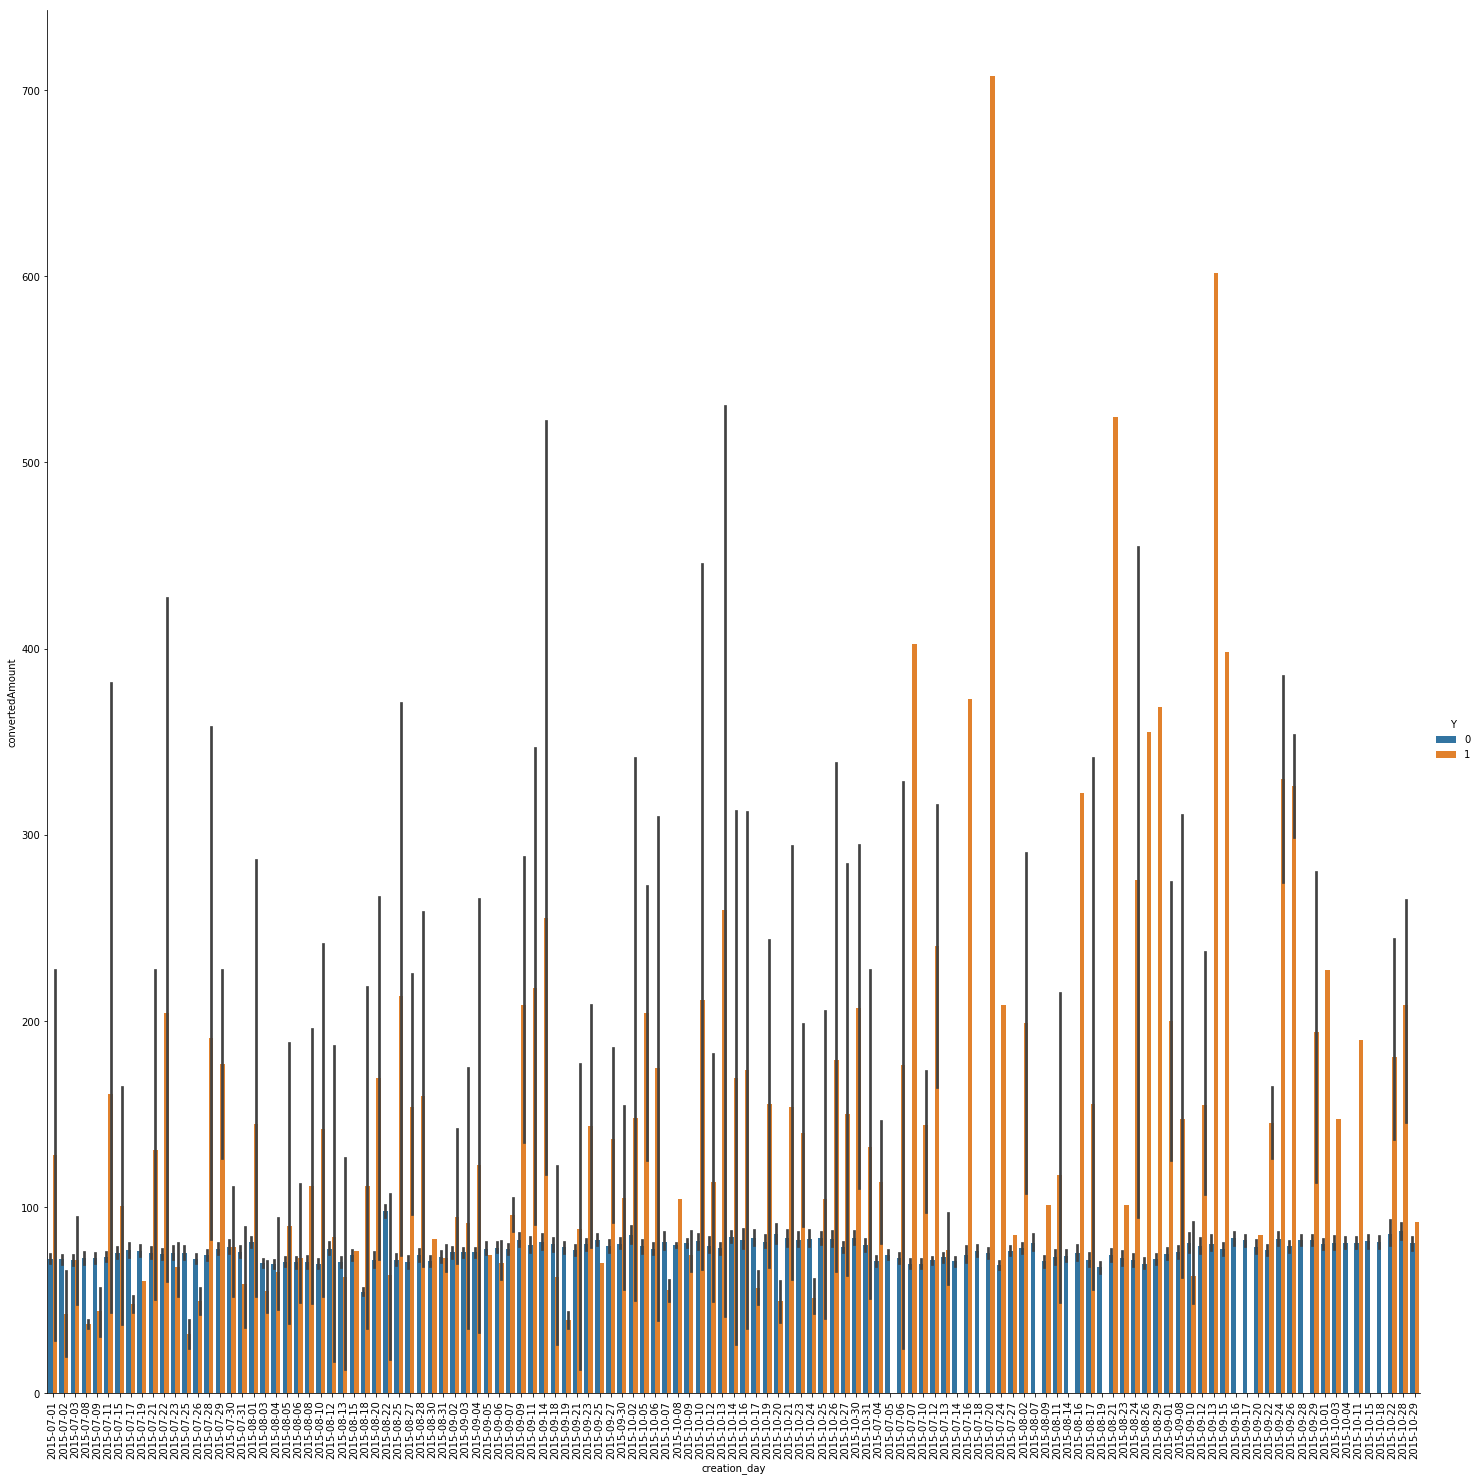

In [18]:
plot7(df)

In the following two plots, we can see the scatter plots for fraudulent (red) and benign (blue) ransactions. This does not yield much information.

c:\python27\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


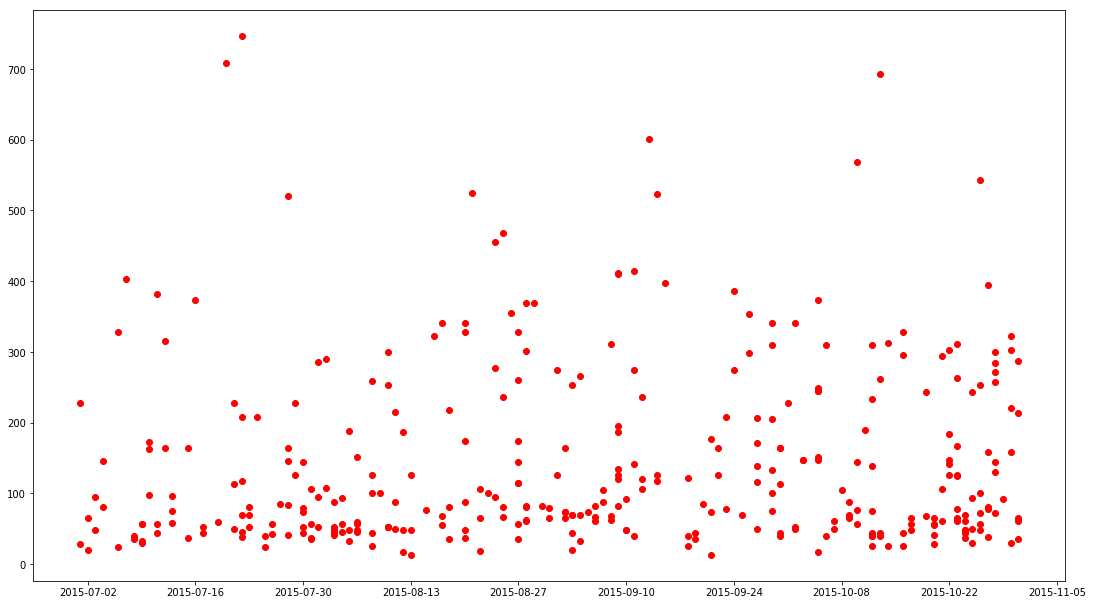

In [15]:
plot8(df)

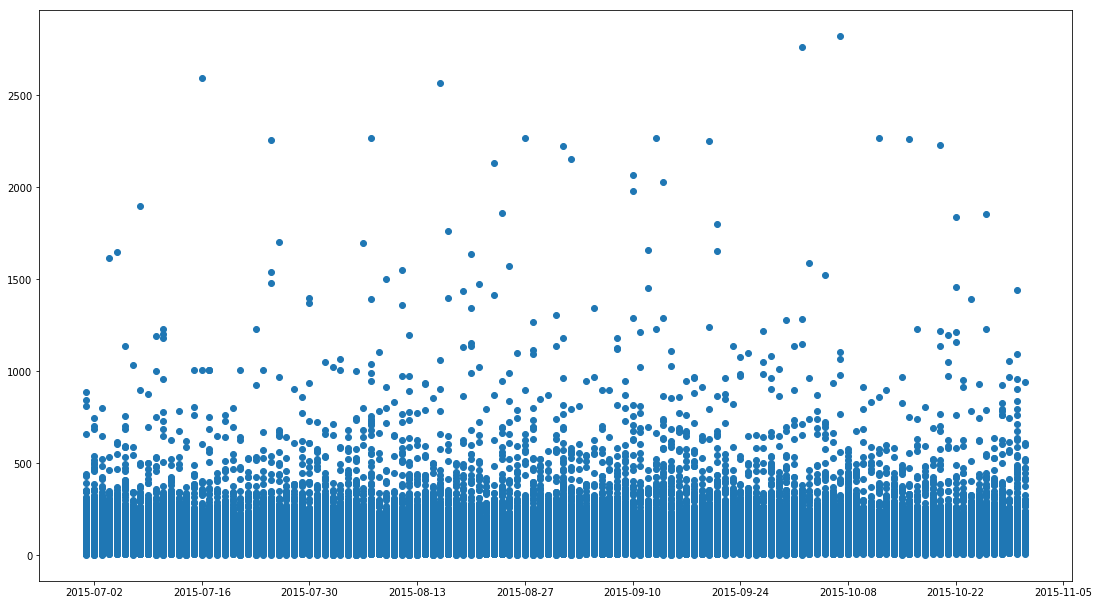

In [16]:
plot9(df)

Here, the dataset is grouped based on whether they were fraudulent or benign. 

In [19]:
fraud_grp = df.groupby(df['Y'])
fraud_grp.count()

,issuercountrycode,txvariantcode,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,hrs,amount1,convertedAmount,convertedAmount_norm,creation_date,creation_month,creation_weekday,creation_hr,creation_day
Y,,,,,,,,,,,,,,,,,,,
0,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165,223165
1,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345


We plot a piechart for fraudulent transactions based on txvariantcode below. 

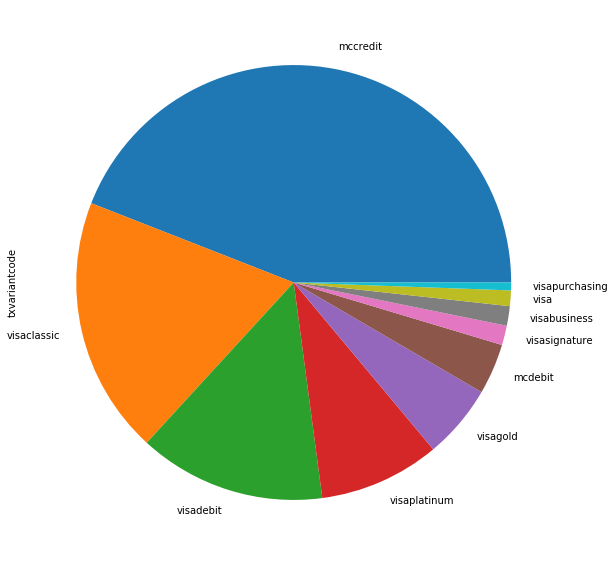

In [20]:
plot10(fraud_grp)

We plot a piechart for benign transactions based on txvariantcode below. 

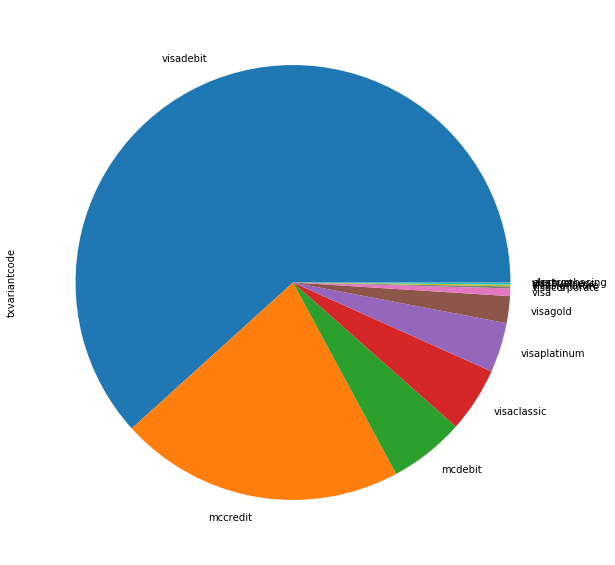

In [21]:
plot11(fraud_grp)

A bulk of fraudulent transactions are carried out by three types of cards - mccredit, visaclassic and visadebit. The special cards like visabusiness and visasignature are less in number probably because the number of these cards issued is less. Also, they might have extra security layers that might prevent fraudsters from using them otherwise. 

## Task B and C

In [22]:
from src.classifiers import *

In [29]:
if __name__ == "__main__":
    filename = 'data_for_student_case_v6.csv'
    # filename = 'data_for_student_case_v5.csv'
    df     = pd.read_csv(filename)
    data   = df.as_matrix()
    X_orig = data[:,:-1]
    Y_orig = data[:,-1].astype(int)
    print (' - Original Y : ', Counter(Y_orig), ' || Type : ', Y_orig.dtype)
    rand_idx = np.random.choice(len(X_orig), len(X_orig), replace=False)
    X_orig = X_orig[rand_idx]
    Y_orig = Y_orig[rand_idx]
    print (' - Original Y : ', Counter(Y_orig), ' || Type : ', Y_orig.dtype)
    
    # --------------------------- #
    # args = {'LogisticRegression':1, 'RandomForestClassifier':{'grid' : 0}, 'SVC':1, 'ensemble':1}
    args = {  'random_state'          : 25,
              'sampling_ratio'        : 0.3,
              'LogisticRegression'    : {'bool':0, 'C':1, 'max_iter':500}
            , 'RandomForestClassifier': {'bool':0, 'n_estimators' : 200}
            , 'AdaBoostClassifier'    : {'bool':1, 'n_estimators': 500, 'learning_rate':1.0}
            , 'SVC'                   : {'bool':0}
            , 'XGBClassifier'         : {'bool':0}
            , 'ensemble'              : {'bool':0}
           }
    smote  = 1
    cv     = 5
    print (' -------- PARAMS ----------- ')
    print (' -- filename : ', filename)
    print (' -- Total Features : ', len(df.columns) - 1)
    print (' -- Sampling Ratio : ', args['sampling_ratio'])
    print (' -- CV : ', cv)
    
    classifiers, conf_matrixes, Y_tests, Y_tests_preds = \
                experiments(X_orig, Y_orig, cv, smote, args)
    
    if (0):
        Y_pred_probab = classifiers[-1].predict_proba(X_orig_test)
        roc_plot(Y_orig_test, Y_pred_probab[:,1])
    
    if (args['LogisticRegression']['bool']):
        clf    = classifiers[0] # if logisistic regression
        coeffs = clf.coef_[0]
        #for i, cols in enumerate(df.columns[:-1]):
        #    print (cols, round(coeffs[i],3))

        plt.title('LogisticRegression - Coefficients')
        plt.bar(range(len(coeffs)), coeffs)
        plt.xticks(range(len(df.columns[:-1])), df.columns[:-1])
        plt.xticks(rotation=90)
    
    if (args['RandomForestClassifier']['bool'] or args['AdaBoostClassifier']['bool']):
        clf    = classifiers[0] # if RandomForests
        coeffs = clf.feature_importances_
        #for i, cols in enumerate(df.columns[:-1]):
        #    print (cols, round(coeffs[i],3))

        plt.title('RandomForest - Feature Importances')
        plt.bar(range(len(coeffs)), coeffs)
        plt.xticks(range(len(df.columns[:-1])), df.columns[:-1])
        plt.xticks(rotation=90)

C:\Users\sujit\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


 - Original Y :  Counter({0: 223165, 1: 345})  || Type :  int32
 - Original Y :  Counter({0: 223165, 1: 345})  || Type :  int32
 -------- PARAMS ----------- 
 -- filename :  data_for_student_case_v6.csv
 -- Total Features :  24
 -- Sampling Ratio :  0.3
 -- CV :  5
 - Solving Q3

 -------------------- Fold :  0  --------------------
 - Y_train :  Counter({0: 178532, 1: 276})
 - Y_test  :  Counter({0: 44633, 1: 69})

 - SMOTEd Y :  Counter({0: 178532, 1: 53559})
 - AdaBoostClassifier
 - Clf Args :  {'bool': 1, 'n_estimators': 500, 'learning_rate': 1.0}


KeyboardInterrupt: 